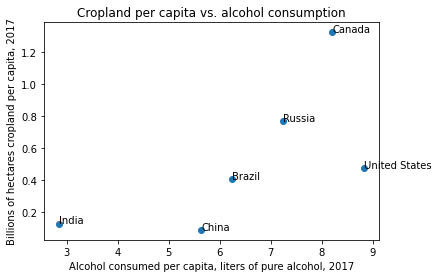

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

alcohol_path = "g:/My Drive/UMBC/Data Science/DATA 601/HW-1/SA_0000001400.csv"
cropland_path = "g:/My Drive/UMBC/Data Science/DATA 601/HW-1/cropland-per-person-over-the-long-term.csv"

alcohol_df = pd.read_csv(alcohol_path) 
alcohol_alltypes_df = alcohol_df.iloc[::5] #I tried to filter by "All types", but was unable to. This way works as well

cropland_df = pd.read_csv(cropland_path)
crop_mask = cropland_df[cropland_df['Year'] == 2016] # filtering based on value

crop_alc_common_country_list = ['Brazil','Canada','China','India','Russia','United States'] #these are the countries the data sets have in common

cropland_alc_country_filter = crop_mask[crop_mask['Entity'].isin(crop_alc_common_country_list)] #filtering by countries common between cropland and alcohol
# print(cropland_alc_country_filter) # Greenland, Russia, United States not returned
alcohol_alltypes_df = alcohol_alltypes_df.replace("United States of America","United States") #syncing terminology
alcohol_alltypes_df = alcohol_alltypes_df.replace("Russian Federation","Russia") #syncing terminology

cropland_alc_country_filter = alcohol_alltypes_df[alcohol_alltypes_df["Country"].isin(crop_alc_common_country_list)]

#print(cropland_alc_country_filter['Country']) #confirm sets have same order
#print(cropland_country_filter['Entity']) #confirm sets have same order

x = cropland_alc_country_filter['2017'] #data to plot
y = cropland_country_filter['Cropland per capita (HYDE (2017))'] #data to plot

plt.figure(1)
plt.plot(x,y,'o')
plt.title('Cropland per capita vs. alcohol consumption')
plt.xlabel('Alcohol consumed per capita, liters of pure alcohol, 2017')
plt.ylabel('Billions of hectares cropland per capita, 2017')

for i in np.arange(0,6): #data labels for plot
    plt.text(cropland_alc_country_filter['2017'].values[i],cropland_country_filter['Cropland per capita (HYDE (2017))'].values[i],crop_alc_common_country_list[i])


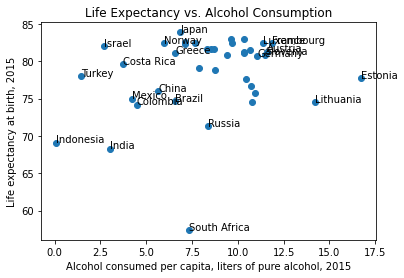

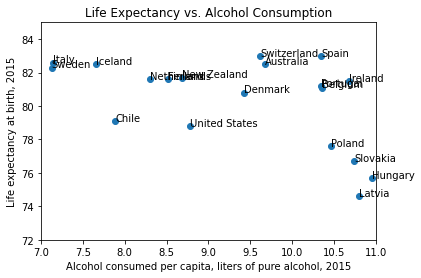

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

life_expectancy_path = "g:/My Drive/UMBC/Data Science/DATA 601/HW-1/life-expectancy-at-birth-oecd.csv"

life_exp_df = pd.read_csv(life_expectancy_path) #creating dataframe
life_exp_2015 = life_exp_df[life_exp_df['Year'] == 2015] #filtering on year 2015, as it's a common year between data sets

life_alc_common_country_list = list(set(alcohol_alltypes_df['Country']).intersection(set(life_exp_2015['Entity']))) #identifying common countries between alcohol and life, then converting to list
life_alc_common_country_list = sorted(life_alc_common_country_list) # sort common country list alphabetically

life_alc_country_filter = life_exp_2015[life_exp_2015['Entity'].isin(life_alc_common_country_list)] #filtering life expectance by countries common between life exp and alcohol
alc_life_country_filter = alcohol_alltypes_df[alcohol_alltypes_df['Country'].isin(life_alc_common_country_list)] #filtering alcohol consumption by countries common between life exp and alcohol

life_alc_merged = alc_life_country_filter.merge(life_exp_2015, left_on = 'Country', right_on = 'Entity')

#Plotting data
plt.figure(1)
y_life = life_alc_merged['Life Expectancy (OECD)']
x_life = life_alc_merged['2015']

plt.plot(x_life,y_life,'o')
plt.title('Life Expectancy vs. Alcohol Consumption')
plt.xlabel('Alcohol consumed per capita, liters of pure alcohol, 2015')
plt.ylabel('Life expectancy at birth, 2015')

# Labeling data
for i in np.arange(0,40): #data labels for plot
    if (life_alc_merged['2015'].values[i] < 7) or (life_alc_merged['2015'].values[i] >11):
        plt.text(life_alc_merged['2015'].values[i],life_alc_merged['Life Expectancy (OECD)'].values[i],life_alc_merged['Country'].values[i])
    elif life_alc_merged['Life Expectancy (OECD)'].values[i] < 72:
         plt.text(life_alc_merged['2015'].values[i],life_alc_merged['Life Expectancy (OECD)'].values[i],life_alc_merged['Country'].values[i])
        
#Now plotting the same thing, but zoomed in
plt.figure(2)
y_life = life_alc_merged['Life Expectancy (OECD)']
x_life = life_alc_merged['2015']

plt.plot(x_life,y_life,'o')
plt.title('Life Expectancy vs. Alcohol Consumption')
plt.xlabel('Alcohol consumed per capita, liters of pure alcohol, 2015')
plt.ylabel('Life expectancy at birth, 2015')
plt.xlim(7.0,11)
plt.ylim(72,85)
# Labeling data
for i in np.arange(0,40): #data labels for plot
    if 7 < life_alc_merged['2015'].values[i] < 11 and 72< life_alc_merged['Life Expectancy (OECD)'].values[i] < 85:
        plt.text(life_alc_merged['2015'].values[i],life_alc_merged['Life Expectancy (OECD)'].values[i],life_alc_merged['Country'].values[i])


In [114]:
alc_life_country_filter.head(10)

,Country,Data Source,Beverage Types,2018,2017,2016,2015,2014,2013,2012,2011,2010
40,Australia,Data source,All types,9.51,9.49,9.79,9.68,9.90,10.00,10.03,10.30,10.52
45,Austria,Data source,All types,11.80,11.70,11.70,11.60,12.20,11.60,12.10,11.90,12.10
80,Belgium,Data source,All types,9.42,9.42,9.42,10.36,10.57,10.33,10.09,10.14,10.27
115,Brazil,Data source,All types,6.19,6.24,6.33,6.59,6.88,6.82,7.08,7.11,7.12
170,Chile,Data source,All types,7.84,7.84,7.78,7.89,7.92,7.23,8.35,7.02,7.55
175,China,Data source,All types,5.62,5.64,5.63,5.66,5.76,5.76,5.69,5.57,5.75
180,Colombia,Data source,All types,4.29,4.33,4.54,4.48,4.34,4.33,4.36,4.28,4.19
195,Costa Rica,Data source,All types,3.79,3.84,3.77,3.72,3.64,3.60,3.51,3.58,3.75
235,Denmark,Data source,All types,9.31,9.30,9.51,9.42,9.56,9.44,9.23,10.45,10.27
280,Estonia,Data source,All types,11.20,13.27,15.95,16.70,17.35,17.77,16.91,16.18,14.83


In [115]:
life_exp_2015.head(10)

,Entity,Code,Year,Life Expectancy (OECD)
55,Australia,AUS,2015,82.5
111,Austria,AUT,2015,81.3
167,Belgium,BEL,2015,81.1
223,Brazil,BRA,2015,74.7
289,Chile,CHL,2015,79.1
345,China,CHN,2015,76.0
401,Colombia,COL,2015,74.2
457,Costa Rica,CRI,2015,79.6
513,Czech Republic,CZE,2015,78.7
563,Denmark,DNK,2015,80.8
